In [6]:
import os
import sys
sys.path.append('/home/liuzhenlong/MIA/MLHospital/mlh/')
sys.path.append('/home/liuzhenlong/MIA/MLHospital/mlh/defenses')

import torchvision
from defenses.membership_inference.AdvReg import TrainTargetAdvReg
from defenses.membership_inference.DPSGD import TrainTargetDP
from defenses.membership_inference.LabelSmoothing import TrainTargetLabelSmoothing
from defenses.membership_inference.MixupMMD import TrainTargetMixupMMD
from defenses.membership_inference.PATE import TrainTargetPATE
from defenses.membership_inference.Normal import TrainTargetNormal
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from data_preprocessing.data_loader import GetDataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import argparse
import numpy as np
import torch.optim as optim
torch.manual_seed(0)
np.random.seed(0)
torch.set_num_threads(1)




/data/anaconda3/envs/ml-hospital/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def parse_args(config_list):
    parser = argparse.ArgumentParser('argument for training')

    parser.add_argument('--batch-size', type=int, default=512,
                        help='batch_size')
    parser.add_argument('--num-workers', type=int, default=10,
                        help='num of workers to use')

    parser.add_argument('--training_type', type=str, default="Normal",
                        help='Normal, LabelSmoothing, AdvReg, DP, MixupMMD, PATE')
    parser.add_argument('--mode', type=str, default="shadow",
                        help='target, shadow')

    parser.add_argument('--epochs', type=int, default=100,
                        help='number of training epochs')
    parser.add_argument('--gpu', type=int, default=0,
                        help='gpu index used for training')

    # model dataset
    parser.add_argument('--model', type=str, default='resnet18')
    parser.add_argument('--load-pretrained', type=str, default='no')
    parser.add_argument('--task', type=str, default='mia',
                        help='specify the attack task, mia or ol')
    parser.add_argument('--dataset', type=str, default='CIFAR10',
                        help='dataset')
    parser.add_argument('--num-class', type=int, default=10,
                        help='number of classes')
    parser.add_argument('--inference-dataset', type=str, default='CIFAR10',
                        help='if yes, load pretrained the attack model to inference')
    parser.add_argument('--data-path', type=str, default='../datasets/',
                        help='data_path')
    parser.add_argument('--input-shape', type=str, default="32,32,3",
                        help='comma delimited input shape input')
    parser.add_argument('--log_path', type=str,
                        default='./save', help='data_path')
    # 默认储存到save里 
    

    args = parser.parse_args(args= config_list)

    args.input_shape = [int(item) for item in args.input_shape.split(',')]
    args.device = 'cuda:%d' % args.gpu if torch.cuda.is_available() else 'cpu'

    return args

In [5]:
import argparse

parser = argparse.ArgumentParser(description='test')

parser.add_argument('--sparse', action='store_true', default=False, help='GAT with sparse version or not.')
parser.add_argument('--seed', type=int, default=72, help='Random seed.')
parser.add_argument('--epochs', type=int, default=10000, help='Number of epochs to train.')




args = parser.parse_args(args=['--seed', '0',  '--sparse'])
print(args.sparse)

args = parser.parse_args(args=['--seed', '0'])

print(args.sparse)
print(args.seed)
print(args.epochs)


True
False
0
10000


In [13]:
opt = parse_args(['--mode', 'target'])


In [20]:
s = GetDataLoader(opt)
target_train_loader, target_inference_loader, target_test_loader, shadow_train_loader, shadow_inference_loader, shadow_test_loader = s.get_data_supervised()


add simple data augmentation!
add simple data augmentation!
Files already downloaded and verified
Files already downloaded and verified
Preparing dataloader!
dataset:  60000
target_train: 10000 	 target_inference: 10000 	 target_test: 10000


/tmp/ipykernel_425479/1501227715.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552411/work/aten/src/ATen/native/TensorShape.cpp:3277.)
  plt.imshow(img.T)


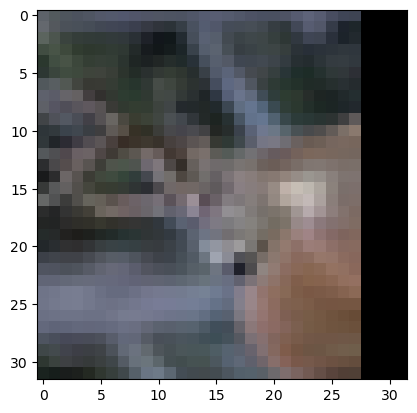

Label: 4


In [30]:
train_features, train_labels= next(iter(target_train_loader))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.T)
plt.show()
print(f"Label: {label}")

In [19]:

from data_preprocessing import configs
type(configs.SUPPORTED_IMAGE_DATASETS_ATTRIBUTE_INFERENCE)

set